<a href="https://colab.research.google.com/github/sanikaijantakar/ML_Journal/blob/main/lwr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [4]:
db = pd.read_csv('housing.csv')
db.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

In [6]:
X_Query = np.array([41]); # Predicting for this input
tau = 0.1 #bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 195791.89387755116


Predicted median house value for housing median age 10: 188971.31990746147
Predicted median house value for housing median age 20: 191856.51425948858
Predicted median house value for housing median age 30: 198157.76714531292
Predicted median house value for housing median age 40: 203682.3067344221
Predicted median house value for housing median age 50: 218262.1988744802


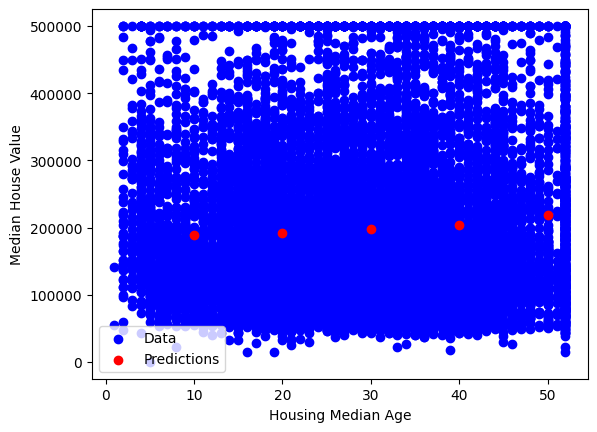

In [7]:
# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

Predicted median house value for query [3.0e+01 5.0e+03 3.5e+00]: 215722.7573041456
Predicted median house value for [1.e+01 4.e+03 2.e+00]: 66936.2201889504
Predicted median house value for [  20.  3000.     4.5]: 214855.76348397176
Predicted median house value for [3.0e+01 5.0e+03 3.5e+00]: 215722.7573041456
Predicted median house value for [4.e+01 6.e+03 5.e+00]: 284269.3827040744
Predicted median house value for [5.e+01 7.e+03 6.e+00]: 538416.4650949918


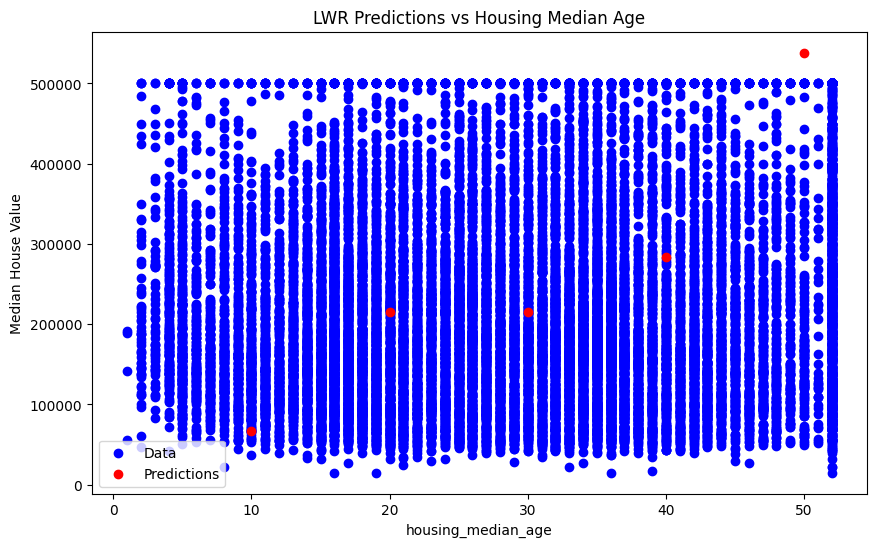

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Locally Weighted Regression with multiple features
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights
    diff = X - x_query  # shape: (n_samples, n_features)
    weights = np.exp(-np.sum(diff**2, axis=1) / (2 * tau**2))

    # Add intercept term
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.r_[1, x_query]  # Shape: (n_features + 1,)

    # Weighted normal equation
    W = np.diag(weights)
    XTW = X_augmented.T @ W
    theta = np.linalg.pinv(XTW @ X_augmented) @ XTW @ Y
    return x_query_augmented @ theta

# Load dataset
db = pd.read_csv('housing.csv')
db = db.dropna()  # Drop missing values if any

# Select three features
features = ['housing_median_age', 'total_rooms', 'median_income']
X = db[features].values
Y = db['median_house_value'].values

# Single prediction
x_query = np.array([30, 5000, 3.5])  # Example query with 3 feature values
tau = 10
y_query = locally_weighted_regression(X, Y, tau, x_query)
print(f"Predicted median house value for query {x_query}: {y_query}")

# Multiple predictions
x_queries = np.array([
    [10, 4000, 2.0],
    [20, 3000, 4.5],
    [30, 5000, 3.5],
    [40, 6000, 5.0],
    [50, 7000, 6.0]
])
predictions = []

for xq in x_queries:
    yq = locally_weighted_regression(X, Y, tau=10, x_query=xq)
    predictions.append(yq)
    print(f"Predicted median house value for {xq}: {yq}")

# Optional: Plot only vs. first feature for visualization
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], Y, color='blue', label='Data')
plt.scatter(x_queries[:, 0], predictions, color='red', label='Predictions')
plt.xlabel(features[0])
plt.ylabel('Median House Value')
plt.legend()
plt.title('LWR Predictions vs Housing Median Age')
plt.show()


Predicted diabetes progression for input [0.05 0.02 0.03]: 153.44
Predicted progression for [0. 0. 0.]: 149.79
Predicted progression for [0.1 0.1 0.1]: 159.49
Predicted progression for [ 0.2  0.  -0.1]: 153.16
Predicted progression for [-0.1  0.2  0.1]: 152.53
Predicted progression for [-0.2 -0.1  0. ]: 140.29


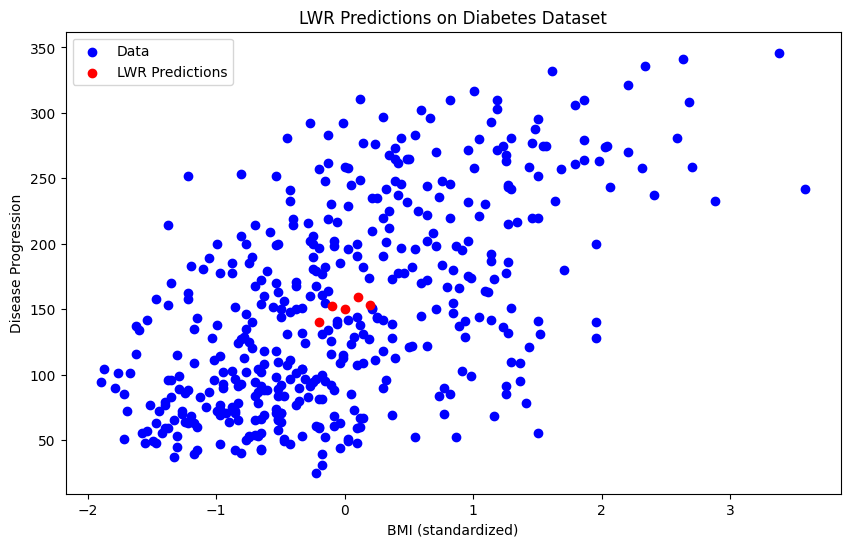

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load diabetes dataset
diabetes = load_diabetes()
X_full = diabetes.data  # Shape: (442, 10)
Y = diabetes.target     # Shape: (442,)

# Select 3 features for simplicity: BMI (2), Blood Pressure (3), and S5 (8)
selected_indices = [2, 3, 8]
X = X_full[:, selected_indices]

# Standardize features for better distance calculation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Locally Weighted Regression function
def locally_weighted_regression(X, Y, tau, x_query):
    diff = X - x_query
    weights = np.exp(-np.sum(diff**2, axis=1) / (2 * tau**2))

    X_aug = np.c_[np.ones(X.shape[0]), X]
    x_query_aug = np.r_[1, x_query]

    W = np.diag(weights)
    XTW = X_aug.T @ W
    theta = np.linalg.pinv(XTW @ X_aug) @ XTW @ Y
    return x_query_aug @ theta

# Make a prediction for one example
x_query = np.array([0.05, 0.02, 0.03])  # Standardized input
tau = 0.5
y_pred = locally_weighted_regression(X, Y, tau, x_query)
print(f"Predicted diabetes progression for input {x_query}: {y_pred:.2f}")

# Predict for multiple inputs
x_queries = np.array([
    [0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1],
    [0.2, 0.0, -0.1],
    [-0.1, 0.2, 0.1],
    [-0.2, -0.1, 0.0]
])
predictions = []

for xq in x_queries:
    yq = locally_weighted_regression(X, Y, tau=0.5, x_query=xq)
    predictions.append(yq)
    print(f"Predicted progression for {xq}: {yq:.2f}")

# Plot predictions vs first feature
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Data')
plt.scatter(x_queries[:, 0], predictions, color='red', label='LWR Predictions')
plt.xlabel('BMI (standardized)')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('LWR Predictions on Diabetes Dataset')
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# ------------------ Locally Weighted Regression Function ------------------ #
def locally_weighted_regression(X, Y, tau, x_query):
    diff = X - x_query
    weights = np.exp(-np.sum(diff**2, axis=1) / (2 * tau**2))
    X_aug = np.c_[np.ones(X.shape[0]), X]
    x_query_aug = np.r_[1, x_query]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ X_aug.T @ W @ Y
    return x_query_aug @ theta

# ------------------------ California Housing Dataset ------------------------ #
print("\n--- California Housing Dataset ---")
housing_df = pd.read_csv("housing.csv")
X_housing = housing_df[['housing_median_age', 'total_rooms', 'median_income']].values
Y_housing = housing_df['median_house_value'].values

scaler_housing = StandardScaler()
X_housing_scaled = scaler_housing.fit_transform(X_housing)

X_housing_test = scaler_housing.transform(np.array([
    [20, 5000, 3],
    [40, 10000, 5],
    [30, 3000, 2]
]))

# KNN
knn_housing = KNeighborsRegressor(n_neighbors=5)
knn_housing.fit(X_housing_scaled, Y_housing)
knn_housing_preds = knn_housing.predict(X_housing_test)

# LWR
tau_housing = 0.8
lwr_housing_preds = [locally_weighted_regression(X_housing_scaled, Y_housing, tau_housing, xq)
                     for xq in X_housing_test]

for i in range(len(X_housing_test)):
    print(f"\nQuery {i+1} (Housing): {X_housing_test[i]}")
    print(f"KNN Prediction : {knn_housing_preds[i]:.2f}")
    print(f"LWR Prediction : {lwr_housing_preds[i]:.2f}")

# ------------------------ Diabetes Dataset ------------------------ #
print("\n\n--- Diabetes Dataset ---")
diabetes = load_diabetes()
X_diabetes = diabetes.data[:, [2, 3, 8]]  # BMI, BP, S5
Y_diabetes = diabetes.target

scaler_diabetes = StandardScaler()
X_diabetes_scaled = scaler_diabetes.fit_transform(X_diabetes)

X_diabetes_test = scaler_diabetes.transform(np.array([
    [0.05, 0.04, 0.03],
    [0.1, 0.1, 0.1],
    [-0.1, -0.2, 0.0]
]))

# KNN
knn_diabetes = KNeighborsRegressor(n_neighbors=5)
knn_diabetes.fit(X_diabetes_scaled, Y_diabetes)
knn_diabetes_preds = knn_diabetes.predict(X_diabetes_test)

# LWR
tau_diabetes = 0.5
lwr_diabetes_preds = [locally_weighted_regression(X_diabetes_scaled, Y_diabetes, tau_diabetes, xq)
                      for xq in X_diabetes_test]

for i in range(len(X_diabetes_test)):
    print(f"\nQuery {i+1} (Diabetes): {X_diabetes_test[i]}")
    print(f"KNN Prediction : {knn_diabetes_preds[i]:.2f}")
    print(f"LWR Prediction : {lwr_diabetes_preds[i]:.2f}")









--- California Housing Dataset ---

Query 1 (Housing): [-0.68647699  1.08373564 -0.458302  ]
KNN Prediction : 145260.00
LWR Prediction : 168363.85

Query 2 (Housing): [0.90268458 3.37567099 0.59445386]
KNN Prediction : 405860.40
LWR Prediction : 369783.74

Query 3 (Housing): [ 0.10810379  0.16696149 -0.98467993]
KNN Prediction : 142160.00
LWR Prediction : 130367.07


--- Diabetes Dataset ---

Query 1 (Diabetes): [1.0511898  0.84095184 0.63071388]
KNN Prediction : 213.20
LWR Prediction : 214.77

Query 2 (Diabetes): [2.1023796 2.1023796 2.1023796]
KNN Prediction : 266.60
LWR Prediction : 249.87

Query 3 (Diabetes): [-2.10237960e+00 -4.20475921e+00 -1.95389319e-15]
KNN Prediction : 71.80
LWR Prediction : 64.35
